# Check GPU 

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7a87a33f-9f76-bdb0-ba7a-f20f4896af30)


In [ ]:
# Check tensorflow version
# import tensorflow as tf
# print(tf.__version__)

In [ ]:
!pip install tensorflow==2.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Get Helper Functions

In [ ]:
import os
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-11-16 15:01:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-16 15:01:50 (89.0 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, compare_historys, plot_loss_curves

# Use Tensorflow datasets to download the data

In [ ]:
# Get tensorflow datasets
import tensorflow_datasets as tfds

In [ ]:
# List available datasets
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [ ]:
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

## Getting one with the data

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
test_labels = [];
for y in tfds.as_numpy(test_data):
  test_labels.append(y[1])

In [ ]:
import numpy as np
test_labels = np.array(test_labels)

In [ ]:
test_labels[:10]

array([44, 27, 79, 16, 51, 12, 17, 99, 13, 42])

In [ ]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
train_one_sample = train_data.take(1)

In [ ]:
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_one_sample:
  print(f"""
  Image Shape : {image.shape}
  Image dtype : {image.dtype}
  Target class from food101 : {label}
  Class Name : {class_names[label.numpy()]}
  """)


  Image Shape : (512, 289, 3)
  Image dtype : <dtype: 'uint8'>
  Target class from food101 : 45
  Class Name : frozen_yogurt
  


In [ ]:
image

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[145, 151, 125],
        [157, 163, 137],
        [159, 165, 139],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [197, 207, 198]],

       [[146, 152, 126],
        [156, 162, 136],
        [158, 164, 138],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [199, 209, 200]],

       [[150, 156, 130],
        [155, 161, 135],
        [157, 163, 137],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [199, 209, 198]],

       ...,

       [[173, 186, 177],
        [174, 187, 178],
        [176, 189, 180],
        ...,
        [181, 197, 187],
        [181, 197, 187],
        [178, 195, 187]],

       [[176, 187, 179],
        [176, 187, 179],
        [176, 189, 180],
        ...,
        [182, 198, 188],
        [182, 198, 188],
        [180, 197, 189]],

       [[178, 189, 181],
        [177, 188, 180],
        [175, 188, 179],
        ...,
        [179, 195, 18

In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot an image

(-0.5, 288.5, 511.5, -0.5)

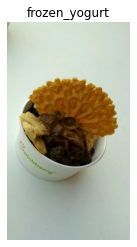

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

# Preprocessing the data (Creating functions for it)

In [ ]:
def preprocess_img(image, label, img_shape=224):
  """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape])
  return tf.cast(image, tf.float32), label # return them as a tuple

In [ ]:
# Preprocess the single image and check the output for that
preprocessed_img = preprocess_img(image, label)[0]

print(f"Image before preprocessing : \n{image}\nShape : {image.shape}\nDataType : {image.dtype}\n")
print(f"Image after preprocessing : \n{preprocessed_img}\nShape : {preprocessed_img.shape}\nDataType : {preprocessed_img.dtype}")

Image before preprocessing : 
[[[145 151 125]
  [157 163 137]
  [159 165 139]
  ...
  [197 209 199]
  [197 209 199]
  [197 207 198]]

 [[146 152 126]
  [156 162 136]
  [158 164 138]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 200]]

 [[150 156 130]
  [155 161 135]
  [157 163 137]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 198]]

 ...

 [[173 186 177]
  [174 187 178]
  [176 189 180]
  ...
  [181 197 187]
  [181 197 187]
  [178 195 187]]

 [[176 187 179]
  [176 187 179]
  [176 189 180]
  ...
  [182 198 188]
  [182 198 188]
  [180 197 189]]

 [[178 189 181]
  [177 188 180]
  [175 188 179]
  ...
  [179 195 185]
  [179 195 185]
  [179 196 190]]]
Shape : (512, 289, 3)
DataType : <dtype: 'uint8'>

Image after preprocessing : 
[[[147.19739 153.19739 127.19739]
  [157.22768 163.22768 137.22768]
  [158.09805 164.09805 138.09805]
  ...
  [197.      209.      197.54907]
  [197.      209.      199.     ]
  [198.09914 208.38936 199.24425]]

 [[154.69467 160.69467 134.69467]
  [155.87053 1

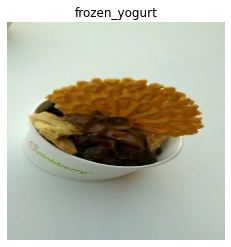

In [ ]:
plt.imshow(preprocessed_img/255.) # Efficient net model automatically do scaling (dividing by 255.)
plt.title(class_names[label])
plt.axis(False);

# Batch and prepare datasets

In [ ]:
# Map train data to preprocess_img function
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map test data to preprocess function
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn into batches 
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# Creating model checkpoint callback

In [ ]:
from helper_functions import create_tensorboard_callback

# Create model checkpoint callback
checkpoint_path = "model_checkpoints/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

# Setup Mixed Precision training

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

# Building feature extraction model

In [ ]:
# !pip install tensorflow==2.8.2

In [ ]:
from tensorflow.keras import layers

# Create base model
input_shape=(224, 224, 3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create functional model
inputs=layers.Input(shape=input_shape, name="input_layer")
# As preprocessing and rescaling is inbuilt in efficient net so we will not add rescaling layer
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="Pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name="softmax_float_32")(x)

# Combine the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float_32 (Activatio  (None, 101)              0         
 n)                                                              
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

# Checking dtype and dtype policy for each layer

In [ ]:
for layer in model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_layer float32 <Policy "float32">
efficientnetb0 float32 <Policy "mixed_float16">
Pooling_layer float32 <Policy "mixed_float16">
dense float32 <Policy "mixed_float16">
softmax_float_32 float32 <Policy "float32">


In [ ]:
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

# Fitting the model

In [ ]:
history_101_food_classes_feature_extract= model.fit(train_data,
                                                    epochs=3,
                                                    steps_per_epoch=len(train_data),
                                                    validation_data=test_data,
                                                    validation_steps=int(0.15 * len(test_data)),
                                                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                           experiment_name="efficient_net_b0_all_classes_feature_extract"),
                                                               model_checkpoint])

Saving TensorBoard log files to: training_logs/efficient_net_b0_all_classes_feature_extract/20221116-150236
Epoch 1/3
2368/2368 [==============================] - 192s 77ms/step - loss: 1.8211 - accuracy: 0.5568 - val_loss: 1.2173 - val_accuracy: 0.6756
Epoch 2/3
2368/2368 [==============================] - 174s 73ms/step - loss: 1.2932 - accuracy: 0.6655 - val_loss: 1.1223 - val_accuracy: 0.6989
Epoch 3/3
2368/2368 [==============================] - 176s 74ms/step - loss: 1.1428 - accuracy: 0.7021 - val_loss: 1.0959 - val_accuracy: 0.7052


In [ ]:
result_feature_extract_model = model.evaluate(test_data)

790/790 [==============================] - 51s 64ms/step - loss: 1.0927 - accuracy: 0.7039


# Save the model

In [ ]:
# Save model locally
save_dir = "07_efficientnetb0_feature_extract_model_mixed_precision"
model.save(save_dir)

In [ ]:
load_saved_model=tf.keras.models.load_model(save_dir)

In [ ]:
# Check for dtype again in saved model
for layer in load_saved_model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False floa

In [ ]:
result_load_saved_model = load_saved_model.evaluate(test_data)

790/790 [==============================] - 53s 65ms/step - loss: 1.0927 - accuracy: 0.7039


In [ ]:
import numpy as np

np.isclose(result_load_saved_model, result_feature_extract_model)

array([ True,  True])

# Fine Tuning

In [ ]:
base_model.trainable = True

for layers in base_model.layers[:-10]:
  layers.trainable=False

In [ ]:
# Check layers of base model again
for layers in base_model.layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

In [ ]:
# Creating early stop callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=4)


In [ ]:
# Create a model checkpoint callback
checkpoint_path = "model_checkpoints_fine_tune/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

In [ ]:
# Compile the model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

# Fit the model with fine tuning

In [ ]:
fine_tune_epochs = 10
history_all_fine_tune = model.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=int(0.15 * len(test_data)),
                                  callbacks=[create_tensorboard_callback(dir_name="fine_tune",
                                                                         experiment_name="efficient_net_b0_all_classes_fine_tune"),
                                            model_checkpoint, early_stop]
                                  )

Saving TensorBoard log files to: fine_tune/efficient_net_b0_all_classes_fine_tune/20221116-151703
Epoch 3/10
2368/2368 [==============================] - 187s 75ms/step - loss: 0.9224 - accuracy: 0.7546 - val_loss: 0.9956 - val_accuracy: 0.7222
Epoch 4/10
2368/2368 [==============================] - 179s 75ms/step - loss: 0.7848 - accuracy: 0.7921 - val_loss: 0.9827 - val_accuracy: 0.7307
Epoch 5/10
2368/2368 [==============================] - 174s 73ms/step - loss: 0.6776 - accuracy: 0.8208 - val_loss: 0.9672 - val_accuracy: 0.7341
Epoch 6/10
2368/2368 [==============================] - 176s 74ms/step - loss: 0.5851 - accuracy: 0.8450 - val_loss: 0.9773 - val_accuracy: 0.7418
Epoch 7/10
2368/2368 [==============================] - 176s 74ms/step - loss: 0.5022 - accuracy: 0.8698 - val_loss: 0.9791 - val_accuracy: 0.7399
Epoch 8/10
2368/2368 [==============================] - 179s 75ms/step - loss: 0.4311 - accuracy: 0.8910 - val_loss: 1.0135 - val_accuracy: 0.7368
Epoch 9/10
2368/2368

In [ ]:
result_all_fine_tune = model.evaluate(test_data)

790/790 [==============================] - 54s 68ms/step - loss: 1.0185 - accuracy: 0.7368


# Making predictions

In [ ]:
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 53s 64ms/step


In [ ]:
pred_classes = pred_probs.argmax(axis=1)

In [ ]:
pred_classes[:10]

array([44, 63, 79, 21, 51, 12, 17,  3, 13, 42])

In [ ]:
# # Creating an empty array
# y_labels = []

# for images, labels in test_data.unbatch():
#   y_labels.append(labels.numpy().argmax())

In [ ]:
# y_labels[:10]

# Getting accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(test_labels, pred_classes)

In [ ]:
sklearn_accuracy

0.1001980198019802

# Creating confusion matrix

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# 

In [ ]:
# class_names = test_data.class_names

In [ ]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_labels, pred_classes)

In [ ]:
test_labels[:10]

array([44, 27, 79, 16, 51, 12, 17, 99, 13, 42])

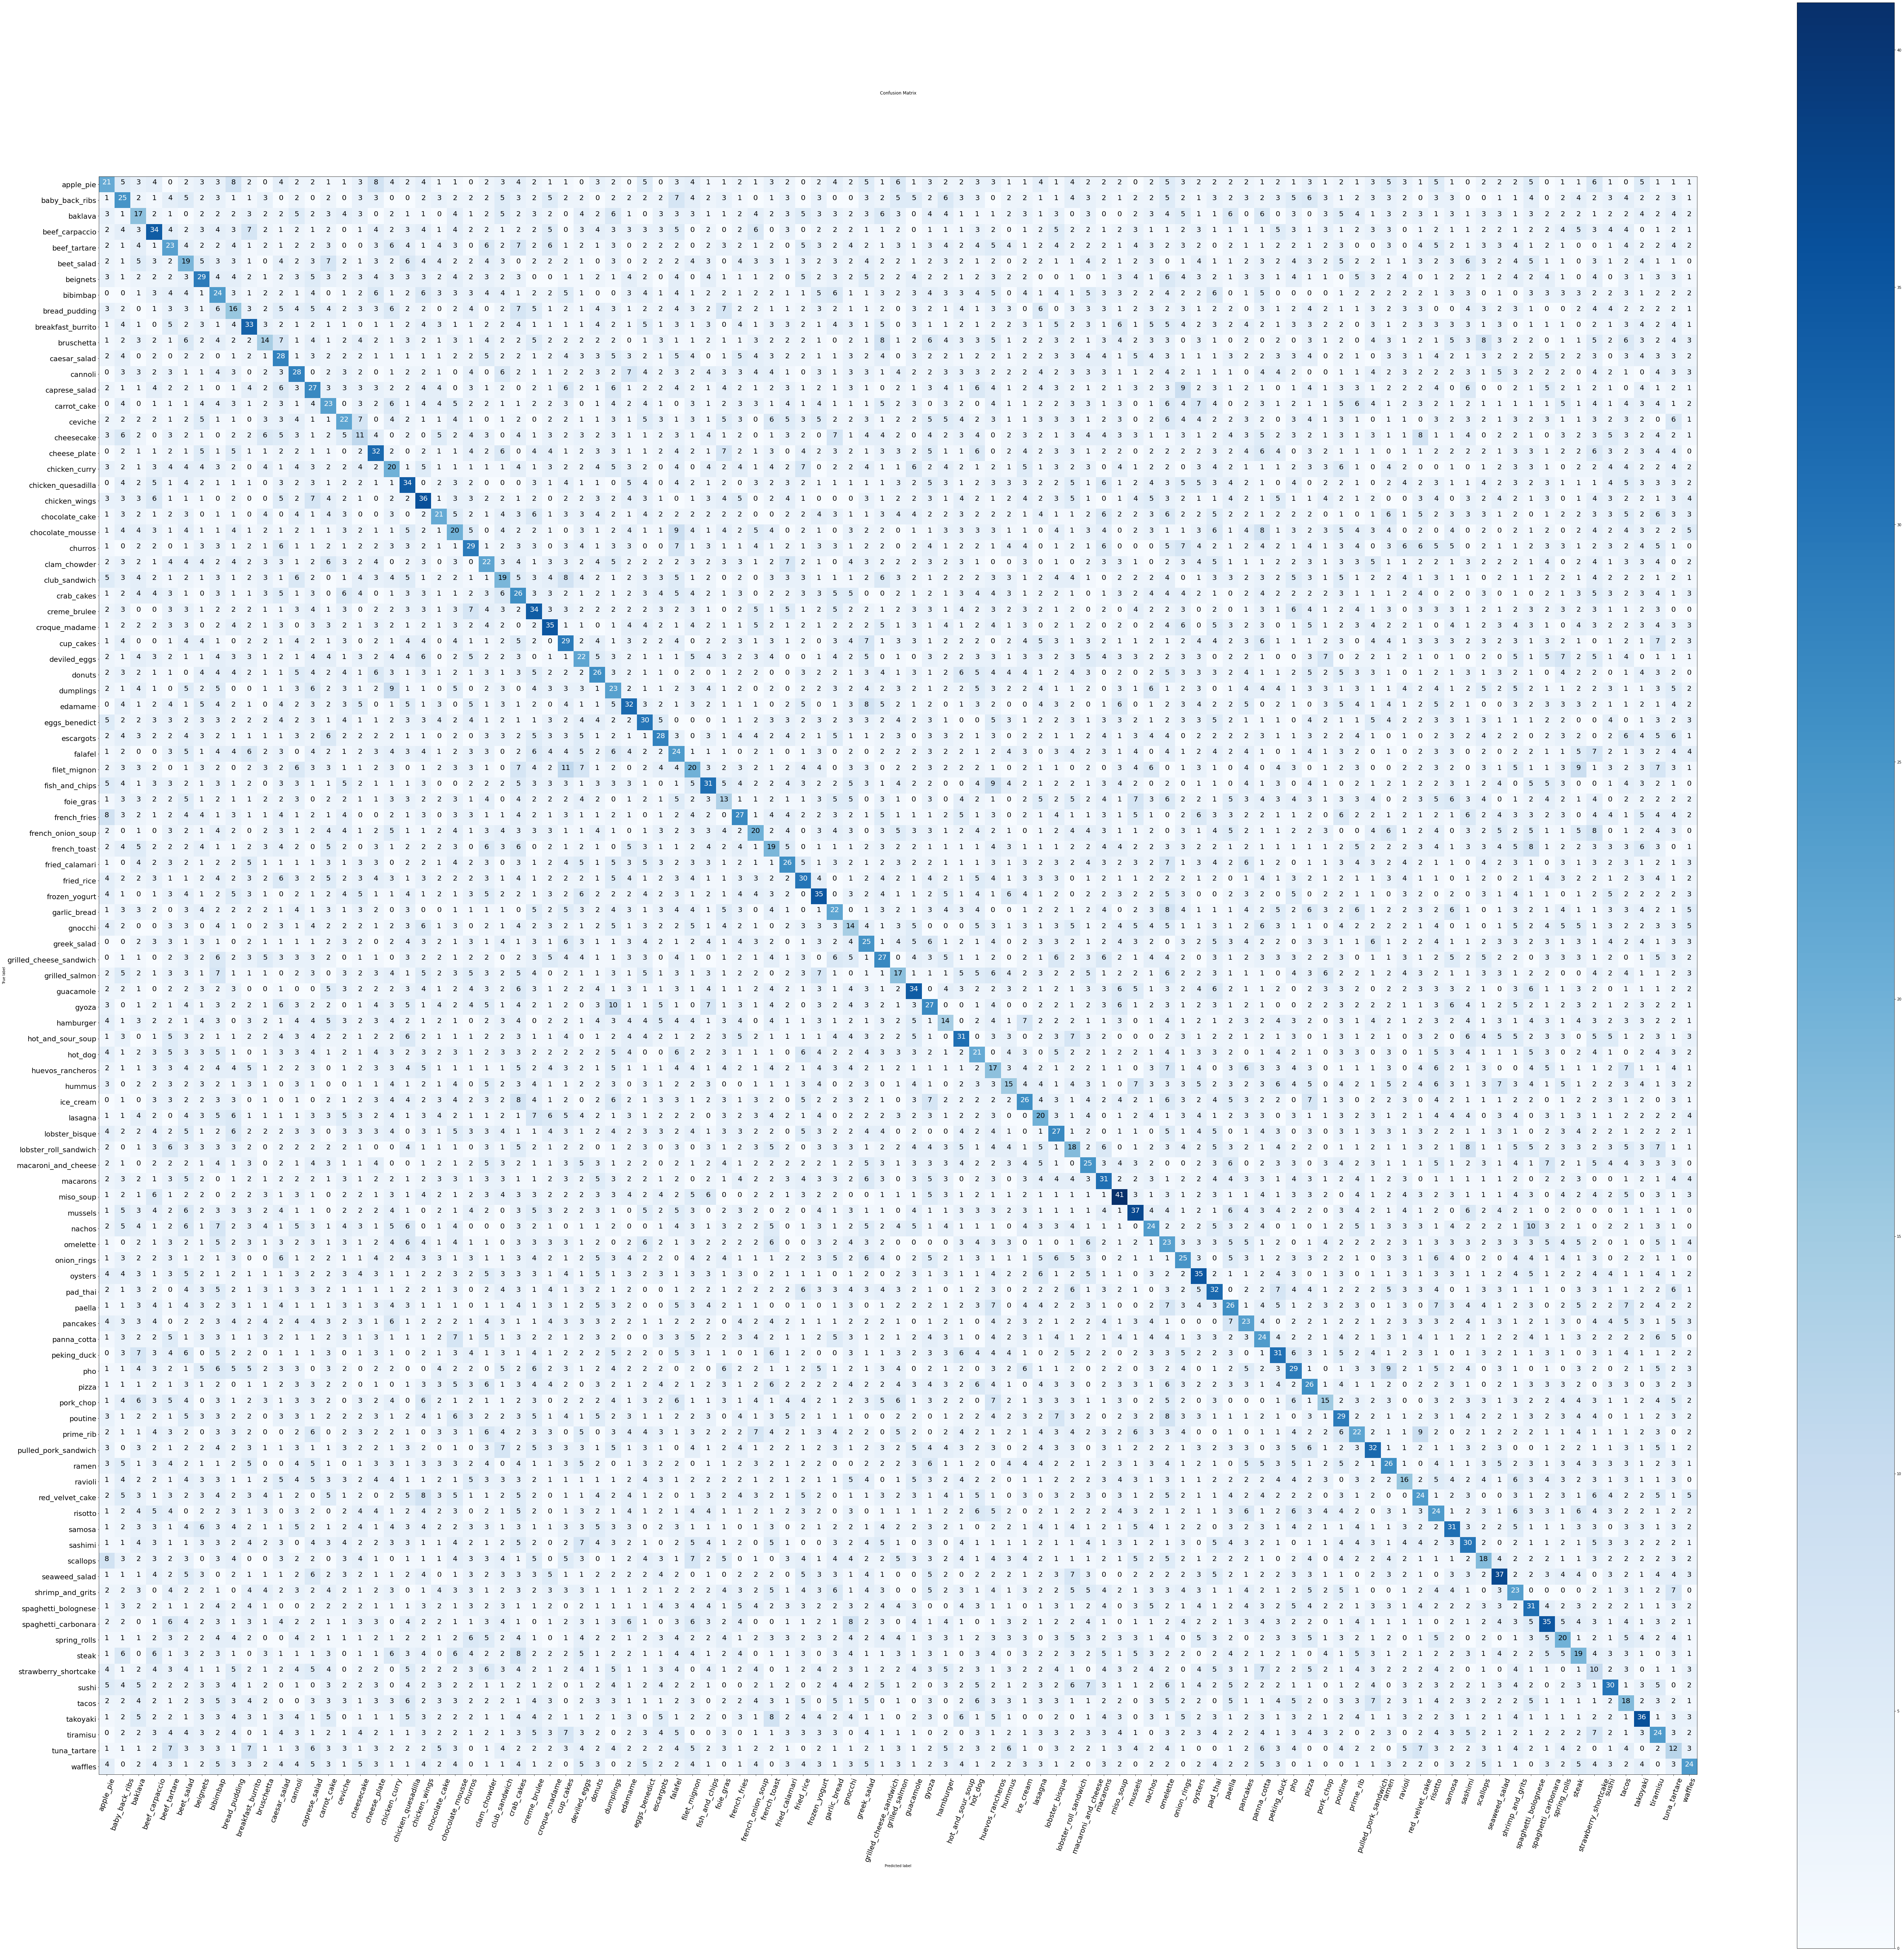

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False
                      )

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, pred_classes)

array([[21,  5,  3, ...,  1,  1,  1],
       [ 1, 25,  2, ...,  2,  3,  1],
       [ 3,  1, 17, ...,  2,  4,  2],
       ...,
       [ 0,  2,  2, ..., 24,  3,  2],
       [ 1,  1,  1, ...,  2, 12,  3],
       [ 4,  0,  2, ...,  0,  3, 24]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       250
           1       0.10      0.10      0.10       250
           2       0.07      0.07      0.07       250
           3       0.13      0.14      0.13       250
           4       0.09      0.09      0.09       250
           5       0.06      0.08      0.07       250
           6       0.12      0.12      0.12       250
           7       0.08      0.10      0.09       250
           8       0.06      0.06      0.06       250
           9       0.14      0.13      0.14       250
          10       0.08      0.06      0.07       250
          11       0.11      0.11      0.11       250
          12       0.10      0.11      0.11       250
          13       0.10      0.11      0.10       250
          14       0.10      0.09      0.09       250
          15       0.10      0.09      0.09       250
          16       0.05      0.04      0.05       250
          17       0.13    

# Visualising Predictions on custom image

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode it into a tensor
  img = tf.io.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  if scale:
    return img/255.
  else:
    return img

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, pred_classes)

0.1001980198019802

In [ ]:
from helper_functions import unzip_data

In [ ]:
# Download some custom images from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data("custom_food_images.zip") 

--2022-11-16 16:45:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.69.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  13.8MB/s    in 0.9s    

2022-11-16 16:45:21 (13.8 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]



In [ ]:
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/hamburger.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/steak.jpeg']

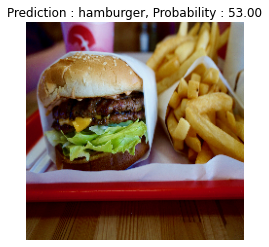

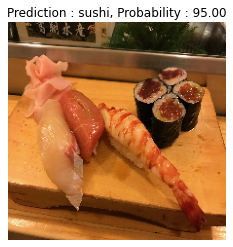

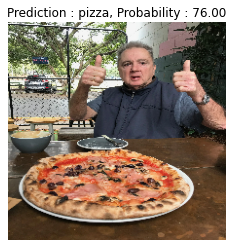

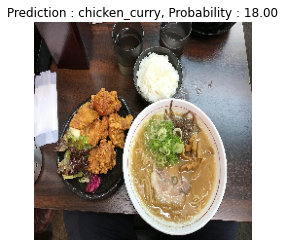

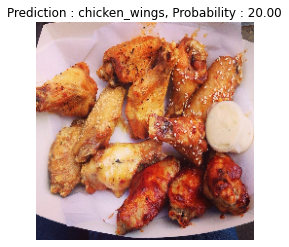

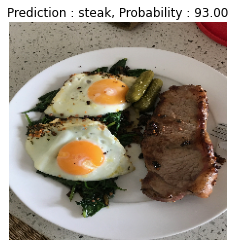

In [ ]:
# Making predictions on these random images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  # Plotting the image
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"Prediction : {pred_class}, Probability : {pred_prob.argmax():.2f}")
  plt.axis(False)

# Thank You!!!  ✨👌